In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def convert_to_rgb(image):
  """fungsi untuk merubah BGR ke RGB dengan opencv"""
  
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image_rgb

In [ ]:
def convert_to_cmy(image):
  """
  Fungsi untuk mengubah citra RGB menjadi CMY.
    
  rumus: C = 1 - R, M = 1 - G, Y = 1 - B
  """
  # Normalisasi nilai RGB ke rentang [0, 1]
  image_normalized = image / 255.0

  # Konversi ke CMY
  C = 1 - image_normalized[:, :, 0]
  M = 1 - image_normalized[:, :, 1]
  Y = 1 - image_normalized[:, :, 2]

  # Gabungkan kanal CMY
  cmy_image = np.stack((C, M, Y), axis=-1)

  # Konversi kembali ke rentang [0, 255] untuk ditampilkan
  cmy_image = (cmy_image * 255).astype(np.uint8)

  # Tampilkan hasil
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title("CMY Image")
  plt.imshow(cmy_image)
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return cmy_image

In [28]:
def convert_to_cmyk(image):
  """
  Fungsi untuk mengubah citra RGB menjadi CMYK.
  Rumus:
  
  C = (1 - R - K) / (1 - K), M = (1 - G - K) / (1 - K), Y = (1 - B - K) / (1 - K), K = min(C, M, Y)
  """
  # Normalisasi nilai RGB ke rentang [0, 1]
  image_normalized = image / 255.0

  # Pisahkan kanal RGB
  R = image_normalized[:, :, 0]
  G = image_normalized[:, :, 1]
  B = image_normalized[:, :, 2]

  # Hitung kanal K
  K = 1 - np.max(image_normalized, axis=2)

  # Hitung kanal C, M, Y
  C = (1 - R - K) / (1 - K + 1e-8)
  M = (1 - G - K) / (1 - K + 1e-8)
  Y = (1 - B - K) / (1 - K + 1e-8)

  # Gabungkan kanal CMYK
  cmyk_image = np.stack((C, M, Y, K), axis=-1)

  # Konversi kembali ke rentang [0, 255] untuk ditampilkan
  cmyk_image = (cmyk_image * 255).astype(np.uint8)

  # Tampilkan hasil
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 3, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(2, 3, 2)
  plt.title("Cyan")
  plt.imshow(C, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 3, 3)
  plt.title("Magenta")
  plt.imshow(M, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 3, 4)
  plt.title("Yellow")
  plt.imshow(Y, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 3, 5)
  plt.title("Black (K)")
  plt.imshow(K, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return cmyk_image

In [30]:
def convert_to_hsi(image):
  """
  Fungsi untuk mengubah citra RGB menjadi HSI.
  """
  # Normalisasi nilai RGB ke rentang [0, 1]
  image_normalized = image / 255.0

  # Pisahkan kanal RGB
  R = image_normalized[:, :, 0]
  G = image_normalized[:, :, 1]
  B = image_normalized[:, :, 2]

  # Hitung Intensity (I)
  I = (R + G + B) / 3.0

  # Hitung Saturation (S)
  min_val = np.minimum(np.minimum(R, G), B)
  S = 1 - (3 / (R + G + B + 1e-8)) * min_val

  # Hitung Hue (H)
  num = 0.5 * ((R - G) + (R - B))
  den = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-8
  theta = np.arccos(num / den)
  H = np.where(B > G, 2 * np.pi - theta, theta)
  H = H / (2 * np.pi)  # Normalisasi ke rentang [0, 1]

  # Gabungkan kanal HSI
  hsi_image = np.stack((H, S, I), axis=-1)

  # Konversi kembali ke rentang [0, 255] untuk ditampilkan
  hsi_image = (hsi_image * 255).astype(np.uint8)

  # Tampilkan hasil
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(2, 2, 2)
  plt.title("Hue")
  plt.imshow(H, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 2, 3)
  plt.title("Saturation")
  plt.imshow(S, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 2, 4)
  plt.title("Intensity")
  plt.imshow(I, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return hsi_image

In [ ]:
def convert_to_yuv(image):
  """
  Fungsi untuk mengubah citra RGB menjadi YUV.
    
  rumus:

  Y = 0.299R + 0.587G + 0.114B, U = 0.492(B - Y), V = 0.877(R - Y)
  """
  # Normalisasi nilai RGB ke rentang [0, 1]
  image_normalized = image / 255.0

  # Pisahkan kanal RGB
  R = image_normalized[:, :, 0]
  G = image_normalized[:, :, 1]
  B = image_normalized[:, :, 2]

    # Hitung kanal Y, U, V
  Y = 0.299 * R + 0.587 * G + 0.114 * B
  U = 0.492 * (B - Y)
  V = 0.877 * (R - Y)

  # Gabungkan kanal YUV
  yuv_image = np.stack((Y, U, V), axis=-1)

  # Konversi kembali ke rentang [0, 255] untuk ditampilkan
  yuv_image = (yuv_image * 255).astype(np.uint8)

  # Tampilkan hasil
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(2, 2, 2)
  plt.title("Y Channel")
  plt.imshow(Y, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 2, 3)
  plt.title("U Channel")
  plt.imshow(U, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 2, 4)
  plt.title("V Channel")
  plt.imshow(V, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return yuv_image

In [37]:
def convert_to_ycbcr(image):
  """
  Fungsi untuk mengubah citra RGB menjadi YCbCr.
    
  rumus:
  Y = 0.299R + 0.587G + 0.114B,
  Cb = 128 - 0.168736R - 0.331364G + 0.5B,
  Cr = 128 + 0.5R - 0.418688G - 0.081312B
  """

  # Normalisasi nilai RGB ke rentang [0, 1]
  image_normalized = image / 255.0

  # Pisahkan kanal RGB
  R = image_normalized[:, :, 0]
  G = image_normalized[:, :, 1]
  B = image_normalized[:, :, 2]

  # Hitung kanal Y, Cb, Cr
  Y = 0.299 * R + 0.587 * G + 0.114 * B
  Cb = -0.168736 * R - 0.331364 * G + 0.5 * B + 0.5
  Cr = 0.5 * R - 0.418688 * G - 0.081312 * B + 0.5

  # Gabungkan kanal YCbCr
  ycbcr_image = np.stack((Y, Cb, Cr), axis=-1)

  # Konversi kembali ke rentang [0, 255] untuk ditampilkan
  ycbcr_image = (ycbcr_image * 255).astype(np.uint8)

  # Tampilkan hasil
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(2, 2, 2)
  plt.title("Y Channel")
  plt.imshow(Y, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 2, 3)
  plt.title("Cb Channel")
  plt.imshow(Cb, cmap='gray')
  plt.axis('off')

  plt.subplot(2, 2, 4)
  plt.title("Cr Channel")
  plt.imshow(Cr, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return ycbcr_image

In [12]:
def sharpening(image, amount=1.5, sigma=1.0):
  """
  sharpening dengan metode gaussian blur.
  
  citra akan diblur terlebih dahulu
  lalu dikembalikan lagi dengan penambahan citra sebelumnya dengan rumus:

  g = (1+a) * f - a * blur(f)
  """

  blurred = cv2.GaussianBlur(image, (5, 5), sigma)
  sharpened = cv2.addWeighted(image, 1 + amount, blurred, -amount, 0)

  plt.figure(figsize=(10,4))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"Sharpened Image\n(amount={amount}, sigma={sigma})")
  plt.imshow(sharpened)
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return sharpened

In [15]:
def smoothing(image, kernel_size=5, sigma=1.0):
  """
  blur dengan metode gaussian blur.

  seperti sharpening dengan gaussian blur, tetapi tidak memerlukan pengembalian citra.
  """

  blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

  plt.figure(figsize=(10,4))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"Smoothed Image\n(kernel={kernel_size}, sigma={sigma})")
  plt.imshow(blurred)
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return blurred

In [ ]:
# Ganti dengan path gambar
image = cv2.imread('../images/kucing3.png')
image_rgb = convert_to_rgb(image)

Konversi RGB ke CMY


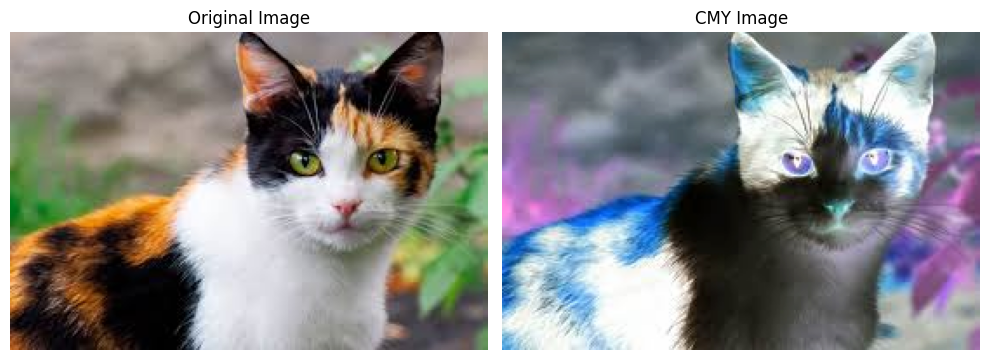

In [ ]:
# Konversi RGB ke CMY
print("Konversi RGB ke CMY")
_ = convert_to_cmy(image_rgb)

Konversi RGB ke CMYK


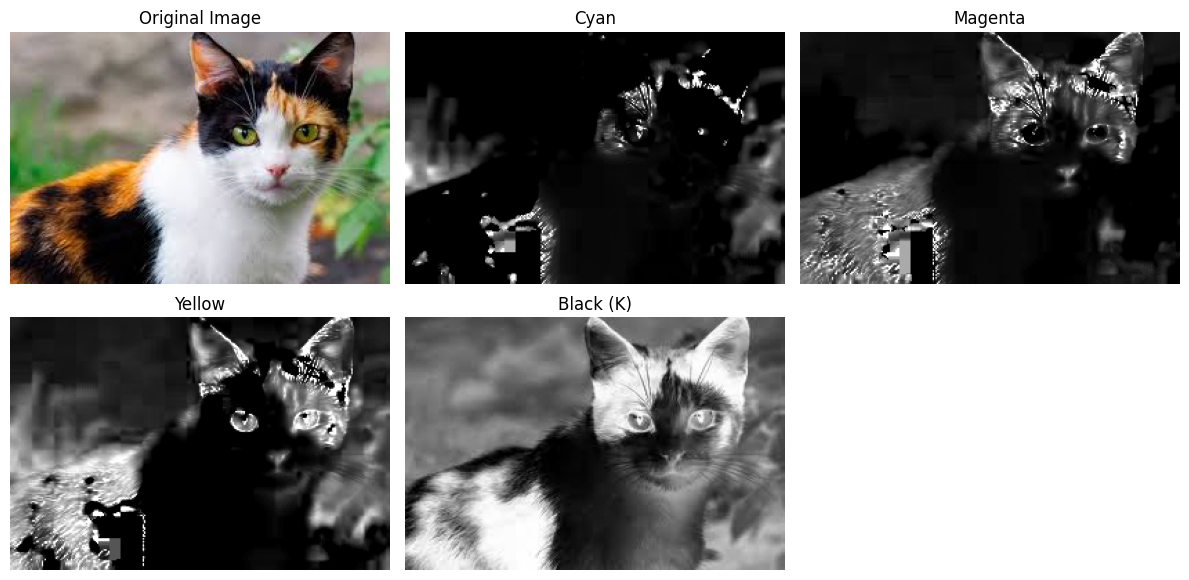

In [29]:
# Konversi RGB ke CMYK
print("Konversi RGB ke CMYK")
_ = convert_to_cmyk(image_rgb)

Konversi RGB ke HSI


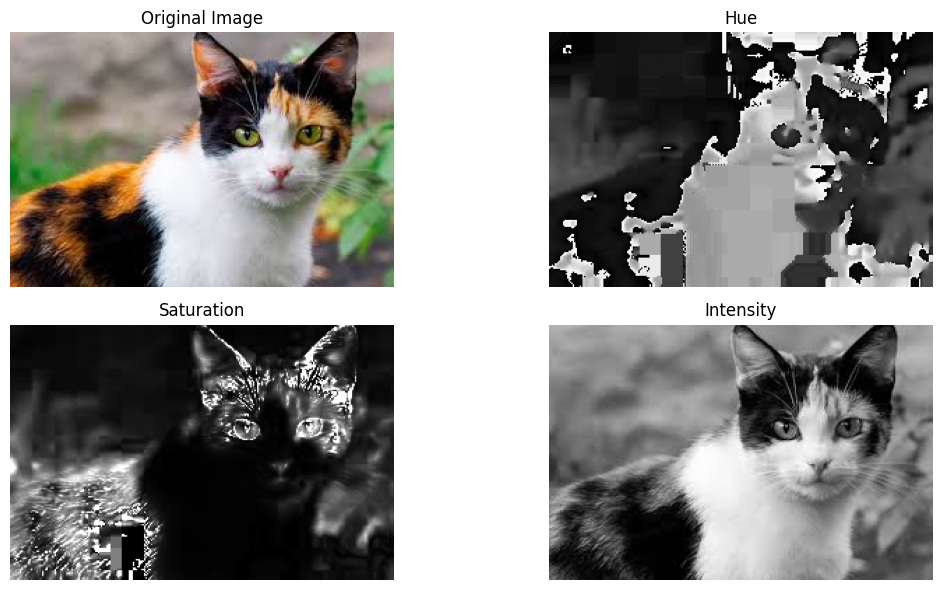

In [31]:
# Konversi RGB ke HSI
print("Konversi RGB ke HSI")
_ = convert_to_hsi(image_rgb)

Konversi RGB ke YUV


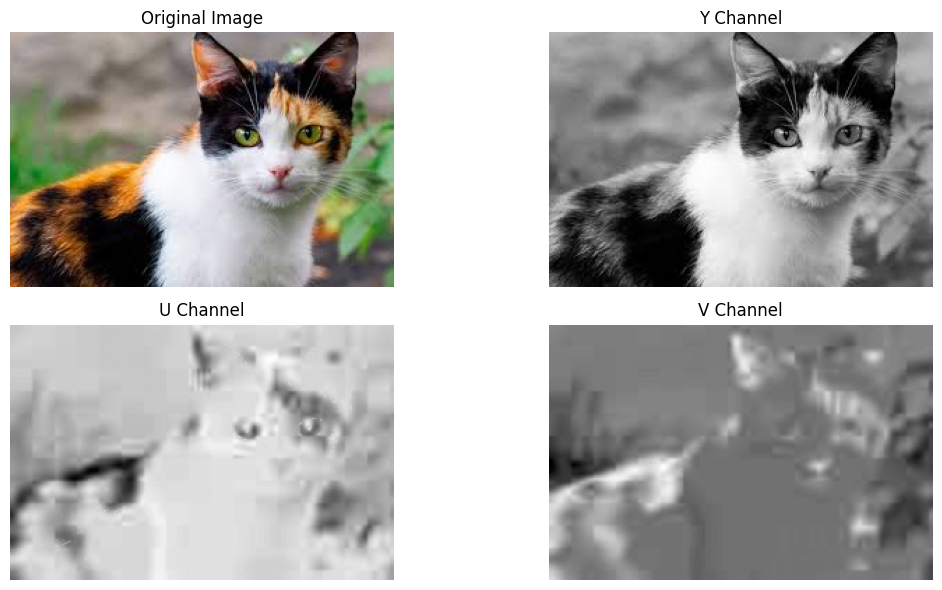

In [33]:
# Konversi RGB ke YUV
print("Konversi RGB ke YUV")
_ = convert_to_yuv(image_rgb)

Konversi RGB ke YCbCr


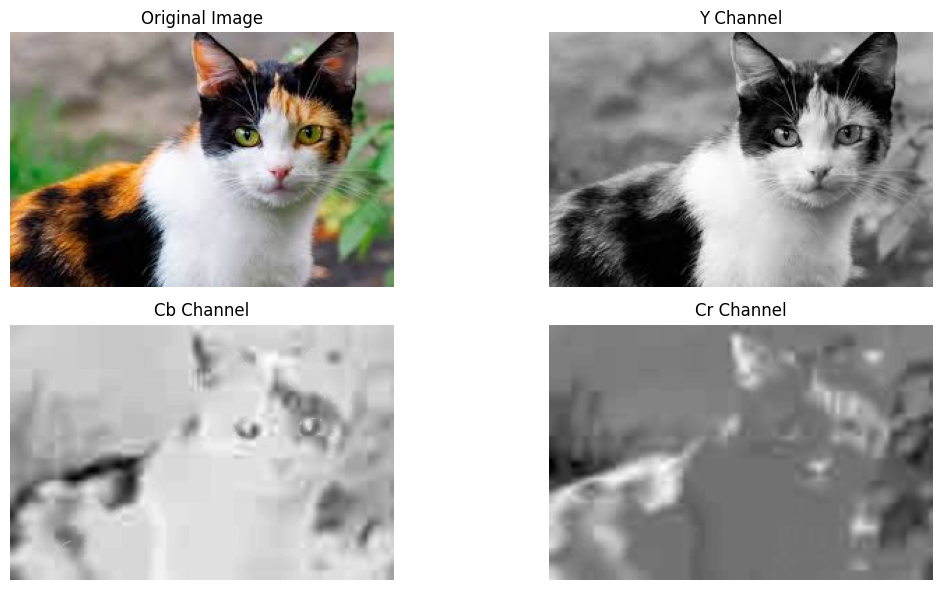

In [36]:
# Konversi RGB ke YCbCr
print("Konversi RGB ke YCbCr")
_ = convert_to_ycbcr(image_rgb)

Sharpening pada Citra Berwarna


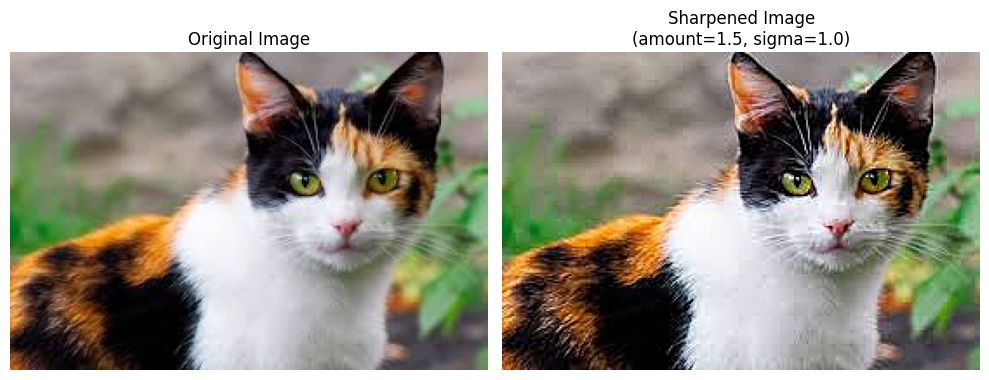

In [ ]:
# Ubah parameter amount dan sigma sesuai kebutuhan
print("Sharpening pada Citra Berwarna")
_ = sharpening(image_rgb, amount=1.5, sigma=1.0)

Smoothing pada Citra Berwarna


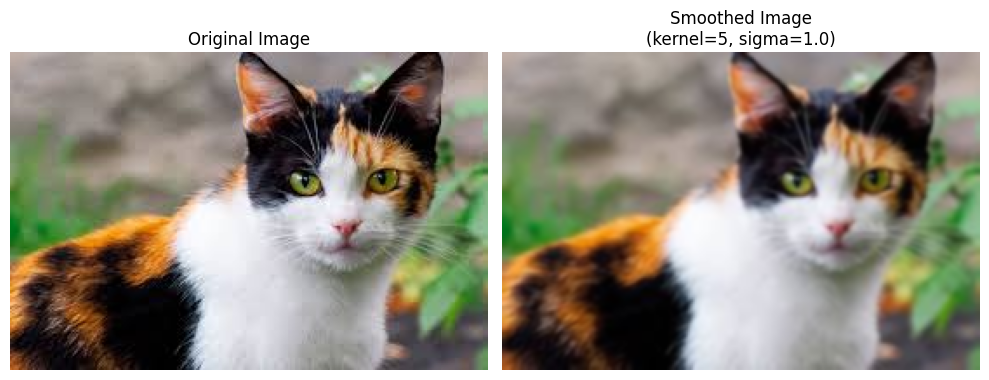

In [ ]:
# Ubah parameter kernel dan sigma sesuai kebutuhan, kernel_size harus ganjil
print("Smoothing pada Citra Berwarna")
_ = smoothing(image_rgb, kernel_size=5, sigma=1.0)